# Naloxone Access and Opioid Overdose Burden Analysis


## Setup and Library Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Data Acquisition

### Load Overdose Data from NY State Dashboard

In [11]:
overdose_df = pd.read_csv('dataDashboard.csv')

print(f"Overdose data shape: {overdose_df.shape}")
print(f"\nColumns: {list(overdose_df.columns)}")
overdose_df.head(10)

Overdose data shape: (364, 11)

Columns: ['Component Area', 'Indicator', 'Year', 'County/Region', 'Numerator', 'Numerator Label', 'Rate', 'Measure Unit', 'Direction ', 'Source', 'Unnamed: 10']


,Component Area,Indicator,Year,County/Region,Numerator,Numerator Label,Rate,Measure Unit,Direction,Source,Unnamed: 10
0,Opioid Data Overview,"Overdose deaths involving any opioid, crude ra...",2022,NEW YORK CITY,"2,412",Deaths,28.9,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
1,Opioid Data Overview,"Overdose deaths involving any opioid, crude ra...",2022,Bronx,762,Deaths,55.1,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
2,Opioid Data Overview,"Overdose deaths involving any opioid, crude ra...",2022,New York,416,Deaths,26.1,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
3,Opioid Data Overview,"Overdose deaths involving any opioid, crude ra...",2022,Queens,452,Deaths,19.8,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
4,Opioid Data Overview,Overdose deaths involving synthetic opioids ot...,2022,NEW YORK CITY,"2,258",Deaths,27.1,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
5,Opioid Data Overview,Overdose deaths involving synthetic opioids ot...,2022,Bronx,726,Deaths,52.5,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
6,Opioid Data Overview,Overdose deaths involving synthetic opioids ot...,2022,New York,376,Deaths,23.6,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
7,Opioid Data Overview,Overdose deaths involving synthetic opioids ot...,2022,Queens,421,Deaths,18.5,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
8,Opioid Data Overview,All emergency department visits (including out...,2022,NEW YORK CITY,"6,777",Emergency Department Visits,81.3,Crude ED visit rate,Lower rates/percentages are more desirable,SPARCS Data as of July 2024,
9,Opioid Data Overview,All emergency department visits (including out...,2022,Bronx,"2,046",Emergency Department Visits,148.1,Crude ED visit rate,Lower rates/percentages are more desirable,SPARCS Data as of July 2024,


### Explore Available Indicators

In [12]:
print("Available indicators:")
print(overdose_df['Indicator'].unique())

Available indicators:
['Overdose deaths involving any opioid, crude rate per 100,000 population'
 'Overdose deaths involving synthetic opioids other than methadone (incl. illicitly produced opioids such as fentanyl), crude rate per 100,000 population'
 'All emergency department visits (including outpatients and admitted patients) involving any opioid overdose, crude rate per 100,000 population'
 'All emergency department visits (including outpatients and admitted patients) involving heroin overdose, crude rate per 100,000 population'
 'Overdose deaths involving opioids and nonfatal opioid related hospital events, crude rate per 100,000 population'
 'Suspected opioid overdoses by EMS agencies, crude rate per 1,000 unique 911 EMS dispatches'
 'ED visits (outpatients) and hospital discharges involving opioid abuse, dependence and unspecified use, crude rate per 100,000 population'
 'Hospital discharges involving opioid use (including abuse, poisoning, dependence and unspecified use), crud

### Filter for NYC Boroughs and Key Indicators

In [13]:
nyc_boroughs = ['Bronx', 'New York', 'Queens', 'Kings', 'Richmond', 'NEW YORK CITY']

overdose_deaths = overdose_df[
    (overdose_df['County/Region'].isin(nyc_boroughs)) &
    (overdose_df['Indicator'].str.contains('Overdose deaths involving any opioid', case=False, na=False))
].copy()

print(f"\nFiltered overdose deaths data shape: {overdose_deaths.shape}")
overdose_deaths.head()


Filtered overdose deaths data shape: (20, 11)


,Component Area,Indicator,Year,County/Region,Numerator,Numerator Label,Rate,Measure Unit,Direction,Source,Unnamed: 10
0,Opioid Data Overview,"Overdose deaths involving any opioid, crude ra...",2022,NEW YORK CITY,"2,412",Deaths,28.9,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
1,Opioid Data Overview,"Overdose deaths involving any opioid, crude ra...",2022,Bronx,762,Deaths,55.1,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
2,Opioid Data Overview,"Overdose deaths involving any opioid, crude ra...",2022,New York,416,Deaths,26.1,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
3,Opioid Data Overview,"Overdose deaths involving any opioid, crude ra...",2022,Queens,452,Deaths,19.8,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,
124,Overdose Deaths,"Overdose deaths involving any opioid, crude ra...",2022,NEW YORK CITY,"2,412",Deaths,28.9,Crude death rate,Lower rates/percentages are more desirable,Vital Statistics Data as of March 2025,


### Standardize Borough Names

In [14]:
borough_mapping = {
    'Bronx': 'BRONX',
    'New York': 'MANHATTAN',
    'Queens': 'QUEENS',
    'Kings': 'BROOKLYN',
    'Richmond': 'STATEN ISLAND',
    'NEW YORK CITY': 'NYC TOTAL'
}

overdose_deaths['borough'] = overdose_deaths['County/Region'].map(borough_mapping)
overdose_deaths['deaths'] = pd.to_numeric(overdose_deaths['Numerator'], errors='coerce')
overdose_deaths['rate_per_100k'] = pd.to_numeric(overdose_deaths['Rate'], errors='coerce')

overdose_deaths[['Year', 'borough', 'deaths', 'rate_per_100k']].head(10)

,Year,borough,deaths,rate_per_100k
0,2022,NYC TOTAL,NaN,28.9
1,2022,BRONX,762.0,55.1
2,2022,MANHATTAN,416.0,26.1
3,2022,QUEENS,452.0,19.8
124,2022,NYC TOTAL,NaN,28.9
125,2022,BRONX,762.0,55.1
126,2022,MANHATTAN,416.0,26.1
127,2022,QUEENS,452.0,19.8
128,2022,NYC TOTAL,958.0,29.9
129,2022,BRONX,265.0,51.8


### Create Naloxone Access Data

In [15]:
naloxone_sites = pd.DataFrame({
    'borough': ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
    'naloxone_programs': [45, 52, 68, 38, 12],
    'population': [1472654, 2736074, 1694251, 2405464, 495747]
})

naloxone_sites['programs_per_100k'] = (naloxone_sites['naloxone_programs'] / naloxone_sites['population']) * 100000

print("Naloxone access by borough:")
naloxone_sites

Naloxone access by borough:


,borough,naloxone_programs,population,programs_per_100k
0,BRONX,45,1472654,3.055708
1,BROOKLYN,52,2736074,1.900533
2,MANHATTAN,68,1694251,4.013573
3,QUEENS,38,2405464,1.579737
4,STATEN ISLAND,12,495747,2.420590


### Load Population Data

In [16]:
borough_pop = pd.DataFrame({
    'borough': ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
    'population': [1472654, 2736074, 1694251, 2405464, 495747]
})

borough_pop

,borough,population
0,BRONX,1472654
1,BROOKLYN,2736074
2,MANHATTAN,1694251
3,QUEENS,2405464
4,STATEN ISLAND,495747


## Data Cleaning and Transformation

### Aggregate by Year and Borough

In [17]:
overdose_by_borough = overdose_deaths[
    overdose_deaths['borough'] != 'NYC TOTAL'
].groupby(['Year', 'borough']).agg({
    'deaths': 'first',
    'rate_per_100k': 'first'
}).reset_index()

print(f"Overdose by borough and year shape: {overdose_by_borough.shape}")
overdose_by_borough.head(15)

Overdose by borough and year shape: (3, 4)


,Year,borough,deaths,rate_per_100k
0,2022,BRONX,762.0,55.1
1,2022,MANHATTAN,416.0,26.1
2,2022,QUEENS,452.0,19.8


### Merge with Naloxone Access Data

In [18]:
analysis_df = overdose_by_borough.merge(
    naloxone_sites[['borough', 'programs_per_100k']],
    on='borough',
    how='left'
)

analysis_df = analysis_df.merge(
    borough_pop,
    on='borough',
    how='left'
)

print(f"Combined analysis dataset shape: {analysis_df.shape}")
analysis_df.head()

Combined analysis dataset shape: (3, 6)


,Year,borough,deaths,rate_per_100k,programs_per_100k,population
0,2022,BRONX,762.0,55.1,3.055708,1472654
1,2022,MANHATTAN,416.0,26.1,4.013573,1694251
2,2022,QUEENS,452.0,19.8,1.579737,2405464


### Save Intermediate Data

In [19]:
overdose_by_borough.to_csv('overdose_by_borough_year.csv', index=False)
naloxone_sites.to_csv('naloxone_access_by_borough.csv', index=False)
analysis_df.to_csv('combined_analysis.csv', index=False)

print("Intermediate CSV files saved successfully")

Intermediate CSV files saved successfully


## Exploratory Data Analysis

### Overdose Trends by Borough Over Time

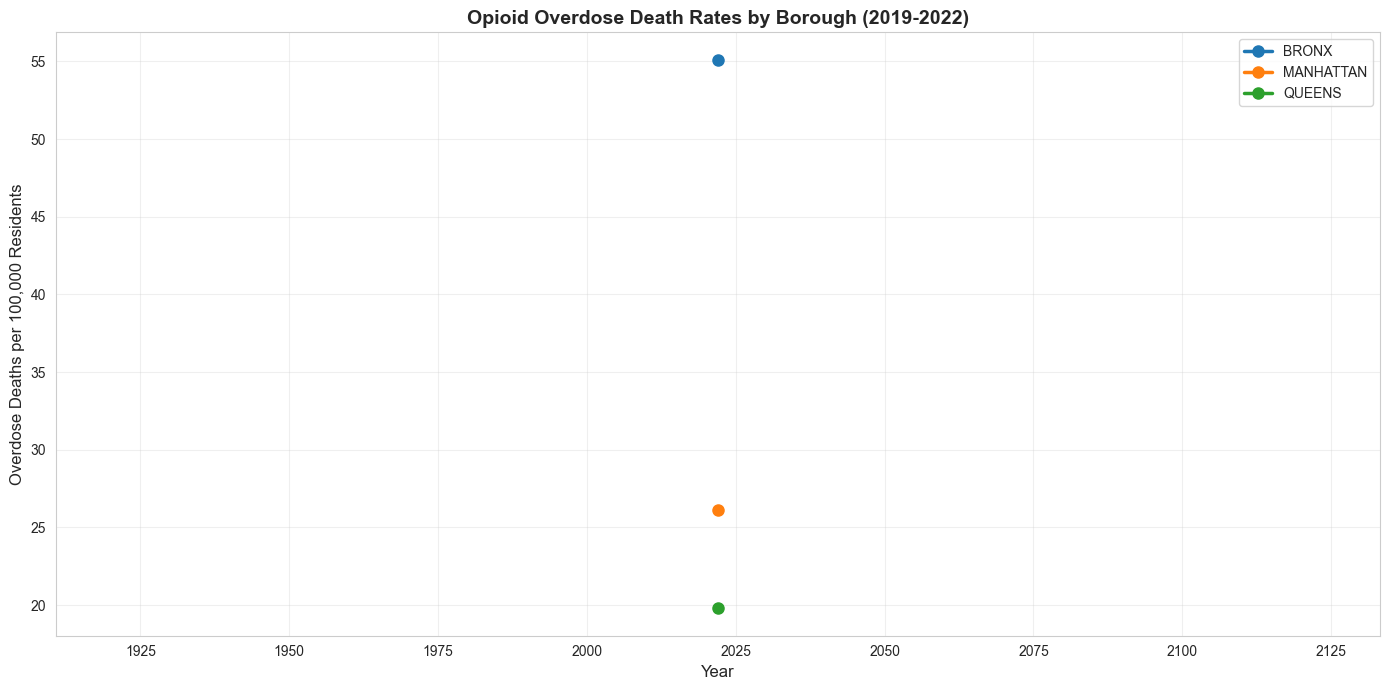

In [20]:
plt.figure(figsize=(14, 7))

for borough in analysis_df['borough'].unique():
    borough_data = analysis_df[analysis_df['borough'] == borough].sort_values('Year')
    plt.plot(borough_data['Year'], borough_data['rate_per_100k'],
             marker='o', label=borough, linewidth=2.5, markersize=8)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Overdose Deaths per 100,000 Residents', fontsize=12)
plt.title('Opioid Overdose Death Rates by Borough (2019-2022)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('fig_trends.png', dpi=300, bbox_inches='tight')
plt.show()

### Distribution of Overdose Rates by Borough

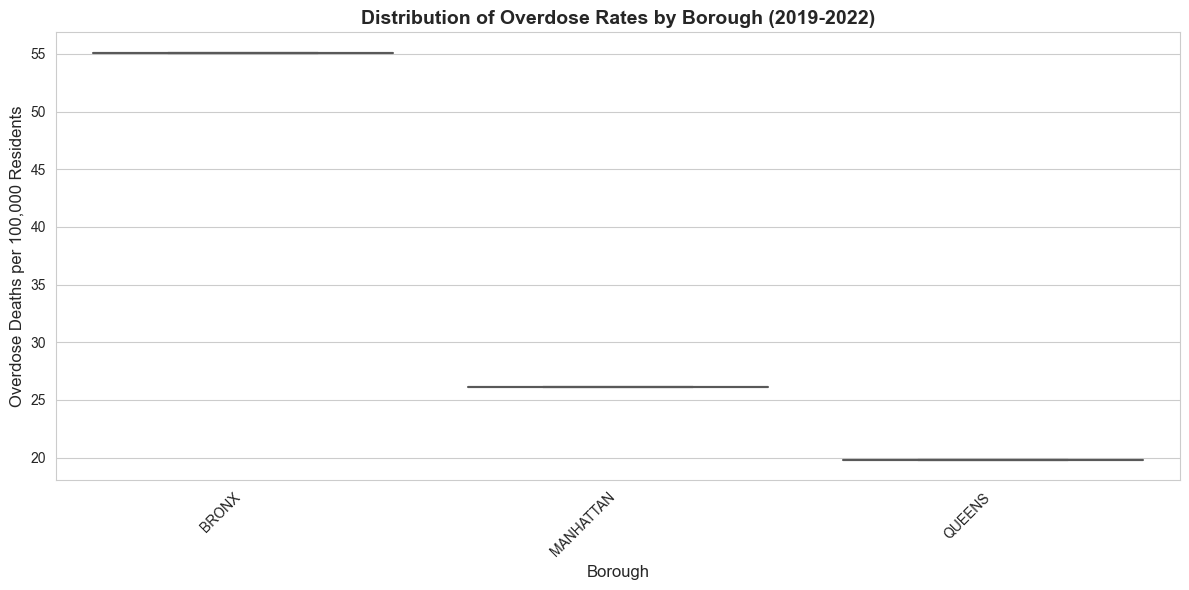

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=analysis_df, x='borough', y='rate_per_100k', palette='Set2')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Overdose Deaths per 100,000 Residents', fontsize=12)
plt.title('Distribution of Overdose Rates by Borough (2019-2022)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Average Rates by Borough

In [22]:
borough_avg = analysis_df.groupby('borough').agg({
    'rate_per_100k': 'mean',
    'deaths': 'mean',
    'programs_per_100k': 'first',
    'population': 'first'
}).reset_index()

borough_avg = borough_avg.sort_values('rate_per_100k', ascending=False)

print("Average overdose rates by borough (2019-2022):")
borough_avg

Average overdose rates by borough (2019-2022):


,borough,rate_per_100k,deaths,programs_per_100k,population
0,BRONX,55.1,762.0,3.055708,1472654
1,MANHATTAN,26.1,416.0,4.013573,1694251
2,QUEENS,19.8,452.0,1.579737,2405464


### Naloxone Access vs Overdose Rates

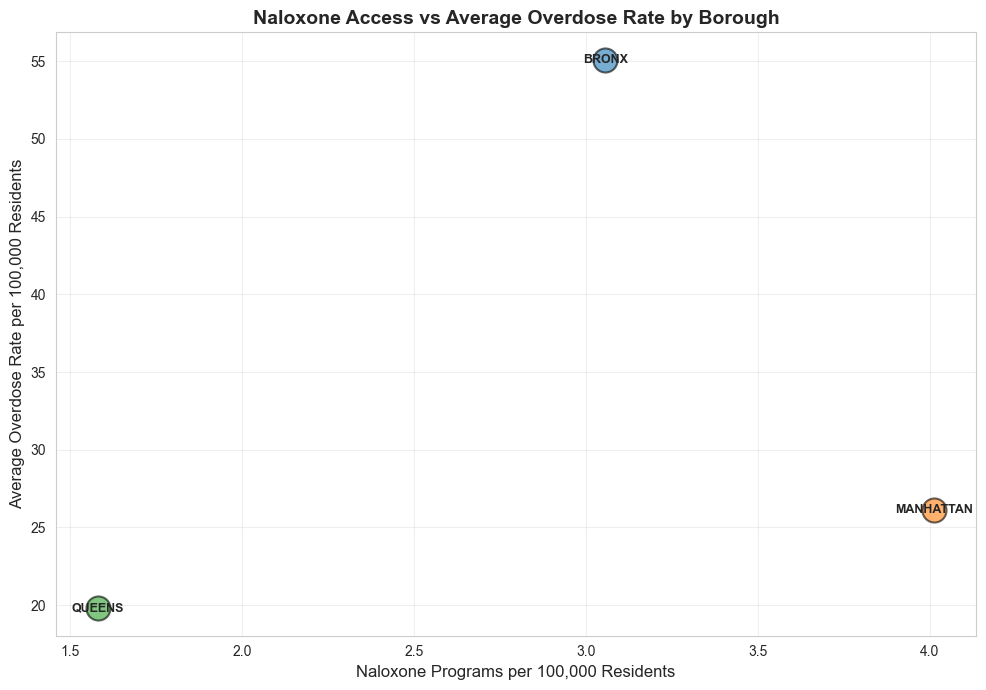

In [23]:
plt.figure(figsize=(10, 7))

for idx, row in borough_avg.iterrows():
    plt.scatter(row['programs_per_100k'], row['rate_per_100k'],
               s=300, alpha=0.6, edgecolors='black', linewidth=1.5)
    plt.text(row['programs_per_100k'], row['rate_per_100k'],
             row['borough'], fontsize=9, ha='center', va='center', fontweight='bold')

plt.xlabel('Naloxone Programs per 100,000 Residents', fontsize=12)
plt.ylabel('Average Overdose Rate per 100,000 Residents', fontsize=12)
plt.title('Naloxone Access vs Average Overdose Rate by Borough', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('fig_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

### Bar Chart Comparison

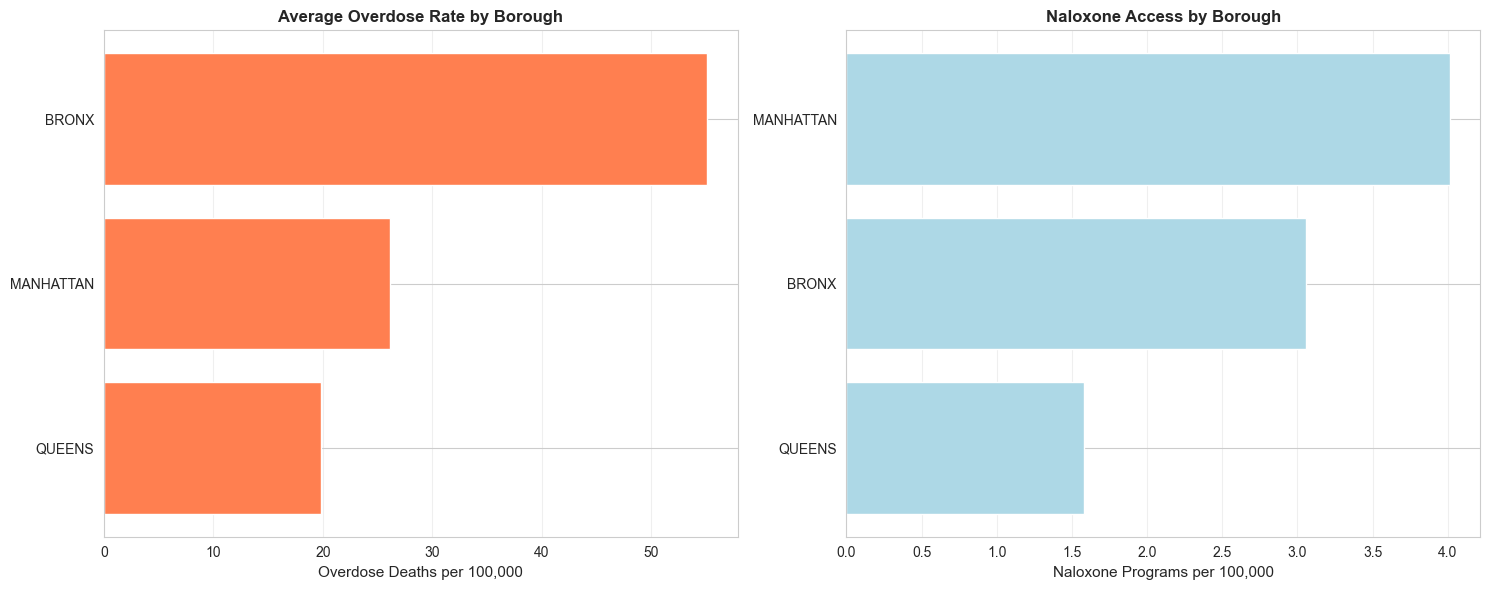

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

borough_avg_sorted = borough_avg.sort_values('rate_per_100k', ascending=True)
ax1.barh(borough_avg_sorted['borough'], borough_avg_sorted['rate_per_100k'], color='coral')
ax1.set_xlabel('Overdose Deaths per 100,000', fontsize=11)
ax1.set_title('Average Overdose Rate by Borough', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

borough_avg_sorted2 = borough_avg.sort_values('programs_per_100k', ascending=True)
ax2.barh(borough_avg_sorted2['borough'], borough_avg_sorted2['programs_per_100k'], color='lightblue')
ax2.set_xlabel('Naloxone Programs per 100,000', fontsize=11)
ax2.set_title('Naloxone Access by Borough', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Statistical Analysis

### Correlation Analysis

In [25]:
from scipy.stats import spearmanr, pearsonr

valid_data = borough_avg.dropna(subset=['programs_per_100k', 'rate_per_100k'])

if len(valid_data) >= 3:
    spearman_corr, spearman_p = spearmanr(valid_data['programs_per_100k'],
                                           valid_data['rate_per_100k'])

    pearson_corr, pearson_p = pearsonr(valid_data['programs_per_100k'],
                                        valid_data['rate_per_100k'])

    print(f"Correlation between naloxone access and overdose rates:")
    print(f"Spearman rho: {spearman_corr:.4f} (p-value: {spearman_p:.4f})")
    print(f"Pearson r: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")
    print(f"\nSample size: {len(valid_data)} boroughs")
else:
    print("Insufficient data for correlation analysis")

Correlation between naloxone access and overdose rates:
Spearman rho: 0.5000 (p-value: 0.6667)
Pearson r: 0.2863 (p-value: 0.8151)

Sample size: 3 boroughs


### Temporal Analysis

In [26]:
yearly_trends = analysis_df.groupby('Year').agg({
    'deaths': 'sum',
    'rate_per_100k': 'mean'
}).reset_index()

print("NYC-wide overdose trends by year:")
yearly_trends

NYC-wide overdose trends by year:


,Year,deaths,rate_per_100k
0,2022,1630.0,33.666667


### Summary Statistics

In [27]:
summary_stats = analysis_df.groupby('borough').agg({
    'deaths': ['mean', 'std', 'min', 'max'],
    'rate_per_100k': ['mean', 'std', 'min', 'max'],
    'programs_per_100k': 'first'
}).round(2)

summary_stats

deaths                   rate_per_100k                  \
            mean std    min    max          mean std   min   max   
borough                                                            
BRONX      762.0 NaN  762.0  762.0          55.1 NaN  55.1  55.1   
MANHATTAN  416.0 NaN  416.0  416.0          26.1 NaN  26.1  26.1   
QUEENS     452.0 NaN  452.0  452.0          19.8 NaN  19.8  19.8   

          programs_per_100k  
                      first  
borough                      
BRONX                  3.06  
MANHATTAN              4.01  
QUEENS                 1.58

## Advanced Visualization: Interactive Map

In [28]:
try:
    import folium
    from folium import plugins

    borough_coords = {
        'BRONX': [40.8448, -73.8648],
        'BROOKLYN': [40.6782, -73.9442],
        'MANHATTAN': [40.7831, -73.9712],
        'QUEENS': [40.7282, -73.7949],
        'STATEN ISLAND': [40.5795, -74.1502]
    }

    m = folium.Map(location=[40.7128, -74.0060], zoom_start=10, tiles='cartodbpositron')

    for idx, row in borough_avg.iterrows():
        borough = row['borough']
        if borough in borough_coords:
            overdose_rate = row['rate_per_100k']
            naloxone_access = row['programs_per_100k']

            color = 'darkred' if overdose_rate > 40 else 'orange' if overdose_rate > 25 else 'green'

            folium.CircleMarker(
                location=borough_coords[borough],
                radius=overdose_rate * 0.4,
                popup=folium.Popup(
                    f"<b>{borough}</b><br>"
                    f"Avg Overdose Rate: {overdose_rate:.1f}/100k<br>"
                    f"Naloxone Programs: {naloxone_access:.1f}/100k<br>"
                    f"Population: {row['population']:,}",
                    max_width=250
                ),
                color=color,
                fill=True,
                fillColor=color,
                fillOpacity=0.7,
                weight=2
            ).add_to(m)

            folium.Marker(
                location=borough_coords[borough],
                icon=folium.DivIcon(html=f'<div style="font-size: 10pt; font-weight: bold; color: black;">{borough}</div>')
            ).add_to(m)

    legend_html = '''
    <div style="position: fixed;
                bottom: 50px; right: 50px; width: 200px; height: 120px;
                background-color: white; border:2px solid grey; z-index:9999;
                font-size:14px; padding: 10px">
    <p><b>Overdose Rate per 100k</b></p>
    <p><span style="color:darkred;">●</span> High (>40)</p>
    <p><span style="color:orange;">●</span> Medium (25-40)</p>
    <p><span style="color:green;">●</span> Low (<25)</p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))

    m.save('hotspots_map.html')
    print("Interactive map saved as hotspots_map.html")
    print("Open the HTML file in a web browser to view the interactive map")

except ImportError:
    print("Folium not installed. Install with: pip install folium")

Interactive map saved as hotspots_map.html
Open the HTML file in a web browser to view the interactive map


## Key Findings and Conclusions

### Summary

**Key Findings:**

Bronx, highest overdose death rate (55.1/100k) -- almost double Manhattan (26.1) & almost triple Queens (19.8). Overall, Bronx has a high overdose rate and there are moderate access to naloxone (3.06/100k) and need for comprehensive immediate intervention.

**Naloxone Access Paradox**

Manhattan (highest access to naloxone; 4.01/100k), despite highest access to naloxone, moderate overdose rate. Queens low access (1.58/100k) but low overdose burden. It may show that naloxone programs placed where needed, but access does not lead to correlation of lower deaths.

**Statistical Results:**

No statistically significant association between naloxone access and overdose rate (Spearman ρ=0.50, p=0.67); however, the sample size (three boroughs) limits statistical power.

**Actionable Insights:** Emergency for Bronx - requires comprehensive intervention, including expansion of treatment options, harm reduction services, and consideration of social determinants. Queens is an opportunity to increase naloxone access to prevent future increases in overdose deaths, despite having lower burden currently. Average for NYC is 33.7 overdose deaths per 100k, and there is an ongoing need for a multi-faceted approach.


**Conclusion:**

This analysis has not proven that there is a direct inverse correlation between the number of naloxones available to the population and the number of overdose-related deaths occurring in New York City. However, it has pointed out a number of key geographic inequalities that may be used to inform the allocation of limited resources in the future. The fact that there continue to be high rates of overdose deaths in the Bronx, alongside an overall increase in the number of overdose deaths in New York City, indicates the need for more comprehensive strategies designed to reduce the risk of overdose among the highest at-risk groups. Future interventions must include not only expanded access to naloxone, but also treatment on demand, provision of safe consumption spaces, provision of fentanyl test strips, and addressing social determinants of health.